In [46]:
import pandas as pd

In [47]:
x=pd.read_excel(r"C:\Users\god's pride\Desktop\ONLY for pca\PCA1.xlsx", 'data imputed')

In [80]:
pip install dataframe_image

Note: you may need to restart the kernel to use updated packages.


In [48]:
x.isnull().sum()

I used online materials to improve my learning                                                                                      0
I used online materials to make Classroom learning more meaningful                                                                  0
I identified expected academic standards using the Cloud Deakin unit site                                                           0
I found that online materials challenged me to learn                                                                                0
To what extent did you access CloudDeakin using a mobile device (i.e. tablet, smartphone BUT not including a laptop computer?       0
To what extent did you access AND download learning materials using a mobile device                                                 0
Teaching staff participated in online discussions                                                                                  16
I found it easy to explain my ideas in online discussions     

In [49]:
from sklearn.impute import KNNImputer
missing=KNNImputer(n_neighbors=5)

In [51]:
z=missing.fit_transform(x)

In [55]:
z=pd.DataFrame(z)
z.isnull().sum() #no null values

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
dtype: int64

In [57]:

import numpy as np
# sklearn module
from sklearn.decomposition import PCA
# plots
import matplotlib.pyplot as plt
import seaborn as sns
# seaborn settings
sns.set_style("whitegrid")
sns.set_context("talk")
# imports for function
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [58]:
pca=PCA()
x_pca=pca.fit_transform(z)

In [59]:
n_components = len(pca.explained_variance_ratio_)
explained_variance = pca.explained_variance_ratio_
cum_explained_variance = np.cumsum(explained_variance)
idx = np.arange(n_components)+1
df_explained_variance = pd.DataFrame([explained_variance, cum_explained_variance], 
                                     index=['explained variance', 'cumulative'], 
                                     columns=idx).T

In [60]:
mean_explained_variance = df_explained_variance.iloc[:,0].mean() # calculate mean explained variance

In [61]:
print('PCA Overview')
print('='*40)
print("Total: {} components".format(n_components))
print('-'*40)
print('Mean explained variance:', round(mean_explained_variance,3))
print('-'*40)
print(df_explained_variance.head(40))
print('-'*40)

PCA Overview
Total: 37 components
----------------------------------------
Mean explained variance: 0.027
----------------------------------------
    explained variance  cumulative
1             0.283882    0.283882
2             0.104030    0.387912
3             0.089528    0.477440
4             0.073117    0.550557
5             0.046560    0.597117
6             0.034324    0.631440
7             0.031197    0.662637
8             0.030005    0.692642
9             0.027480    0.720122
10            0.024629    0.744751
11            0.021882    0.766633
12            0.017910    0.784544
13            0.016629    0.801172
14            0.016266    0.817438
15            0.015287    0.832725
16            0.013871    0.846596
17            0.013439    0.860035
18            0.011773    0.871808
19            0.011359    0.883166
20            0.011038    0.894204
21            0.010476    0.904680
22            0.009564    0.914244
23            0.009172    0.923416
24           

Limit scree plot to nth component (0 for all) > 40


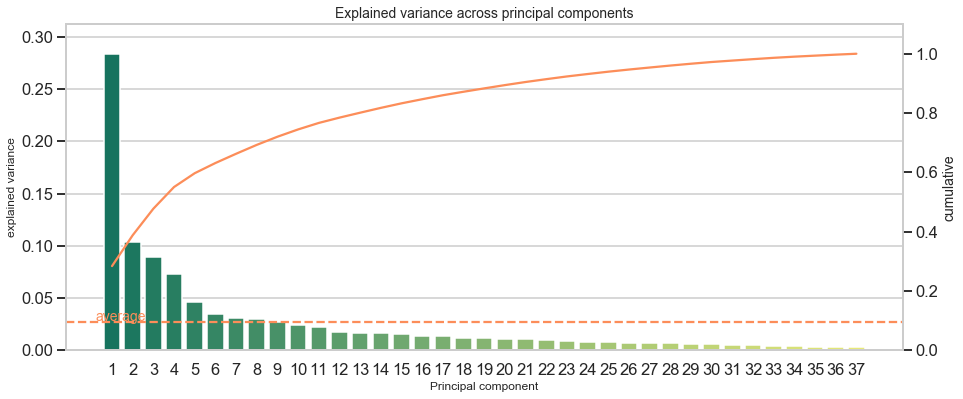

In [62]:
#limit plot to x PC
limit = int(input("Limit scree plot to nth component (0 for all) > "))
if limit > 0:
    limit_df = limit
else:
    limit_df = n_components
df_explained_variance_limited = df_explained_variance.iloc[:limit_df,:]
#make scree plot
fig, ax1 = plt.subplots(figsize=(15,6))
ax1.set_title('Explained variance across principal components', fontsize=14)
ax1.set_xlabel('Principal component', fontsize=12)
ax1.set_ylabel('Explained variance', fontsize=12)
ax2 = sns.barplot(x=idx[:limit_df], y='explained variance', data=df_explained_variance_limited, palette='summer')
ax2 = ax1.twinx()
ax2.grid(False)
ax2.set_ylabel('Cumulative', fontsize=14)
ax2 = sns.lineplot(x=idx[:limit_df]-1, y='cumulative', data=df_explained_variance_limited, color='#fc8d59')
ax1.axhline(mean_explained_variance, ls='--', color='#fc8d59') #plot mean
ax1.text(-.8, mean_explained_variance+(mean_explained_variance*.05), "average", color='#fc8d59', fontsize=14) #label y axis
max_y1 = max(df_explained_variance_limited.iloc[:,0])
max_y2 = max(df_explained_variance_limited.iloc[:,1])
ax1.set(ylim=(0, max_y1+max_y1*.1))
ax2.set(ylim=(0, max_y2+max_y2*.1))
plt.show()

In [64]:
m=x.columns
m

Index(['I used online materials to improve my learning',
       'I used online materials to make Classroom learning more meaningful',
       'I identified expected academic standards using the Cloud Deakin unit site',
       'I found that online materials challenged me to learn',
       'To what extent did you access CloudDeakin using a mobile device (i.e. tablet, smartphone BUT not including a laptop computer? ',
       'To what extent did you access AND download learning materials using a mobile device',
       'Teaching staff participated in online discussions',
       'I found it easy to explain my ideas in online discussions',
       'I had helpful online discussions with other students',
       'I met new people when using the CloudDeakin system',
       'I used the CloudDeakin system with other students around the campus (on-campus students only)',
       'I used the CloudDeakin system to work with other students outside the class (on-campus students only)',
       'I used the C

In [67]:
loadings=pd.DataFrame(pca.components_.T * np.sqrt(pca.explained_variance_), columns=range(1,38), index=m)
loadings

,1,2,3,4,5,6,7,8,9,10,...,28,29,30,31,32,33,34,35,36,37
I used online materials to improve my learning,-0.327207,0.295092,0.162219,0.231689,0.044837,0.041057,0.154169,0.305531,0.086816,0.148640,...,-0.044200,0.305748,-0.138556,-0.072475,0.058415,0.117954,-0.035629,0.010653,0.008715,0.005775
I used online materials to make Classroom learning more meaningful,-0.485623,0.096226,0.169309,0.379234,0.042103,0.151881,0.259782,0.696962,0.280286,0.425780,...,0.075358,-0.095893,0.029083,0.030172,0.001882,-0.038052,0.010033,-0.009692,-0.001985,0.010163
I identified expected academic standards using the Cloud Deakin unit site,-0.436127,0.252114,0.153616,0.204721,0.025542,0.028336,0.097259,0.205189,0.104962,0.124406,...,-0.013212,-0.023834,0.120745,0.041915,-0.057186,0.005543,0.034941,-0.005116,-0.023344,-0.025938
I found that online materials challenged me to learn,-0.521547,0.325129,0.163300,0.197848,0.198629,0.282329,0.147406,0.281985,-0.002307,0.181341,...,-0.003430,-0.028687,0.034408,-0.010688,0.012307,0.006155,0.004664,-0.013461,0.011592,0.026703
"To what extent did you access CloudDeakin using a mobile device (i.e. tablet, smartphone BUT not including a laptop computer?",-0.232864,-0.218867,0.045470,0.224082,0.023398,0.014887,0.647733,-0.495063,-0.125399,0.182070,...,0.335186,0.087818,0.213131,-0.036075,-0.084941,0.012927,0.004097,0.008094,-0.007939,-0.026760
To what extent did you access AND download learning materials using a mobile device,-0.346786,-0.243047,0.037832,0.176349,0.138678,0.073387,0.720558,-0.501576,-0.090887,0.277858,...,-0.296124,-0.074617,-0.191811,0.047110,0.073914,-0.023330,-0.005131,-0.000178,0.004829,0.034530
Teaching staff participated in online discussions,-0.436241,0.346415,-0.040450,0.092171,0.121747,-0.202377,-0.221050,-0.209406,0.242852,0.340759,...,0.041658,-0.057706,0.012543,-0.006956,-0.001130,-0.001456,-0.021185,0.035716,-0.007606,0.000954
I found it easy to explain my ideas in online discussions,-0.983231,0.152720,-0.595342,-0.243457,0.354381,-0.547769,-0.087764,-0.163735,0.413694,0.010819,...,-0.016833,0.054523,0.052702,-0.007663,0.016169,-0.007842,0.017837,-0.001455,0.008745,-0.008943
I had helpful online discussions with other students,-1.113518,-0.044181,-0.660433,-0.275954,0.628578,-0.355278,0.032819,0.016357,0.060281,-0.011956,...,0.002948,-0.024645,-0.005594,0.020717,-0.014513,-0.001384,-0.009303,-0.015398,0.011427,0.001163
I met new people when using the CloudDeakin system,-0.929665,-0.070173,-0.560906,-0.165127,0.655421,0.167950,0.067691,0.182319,-0.044212,-0.085878,...,0.015087,-0.001505,-0.009095,0.003226,-0.009292,-0.014252,-0.031069,0.019635,-0.009897,-0.003227


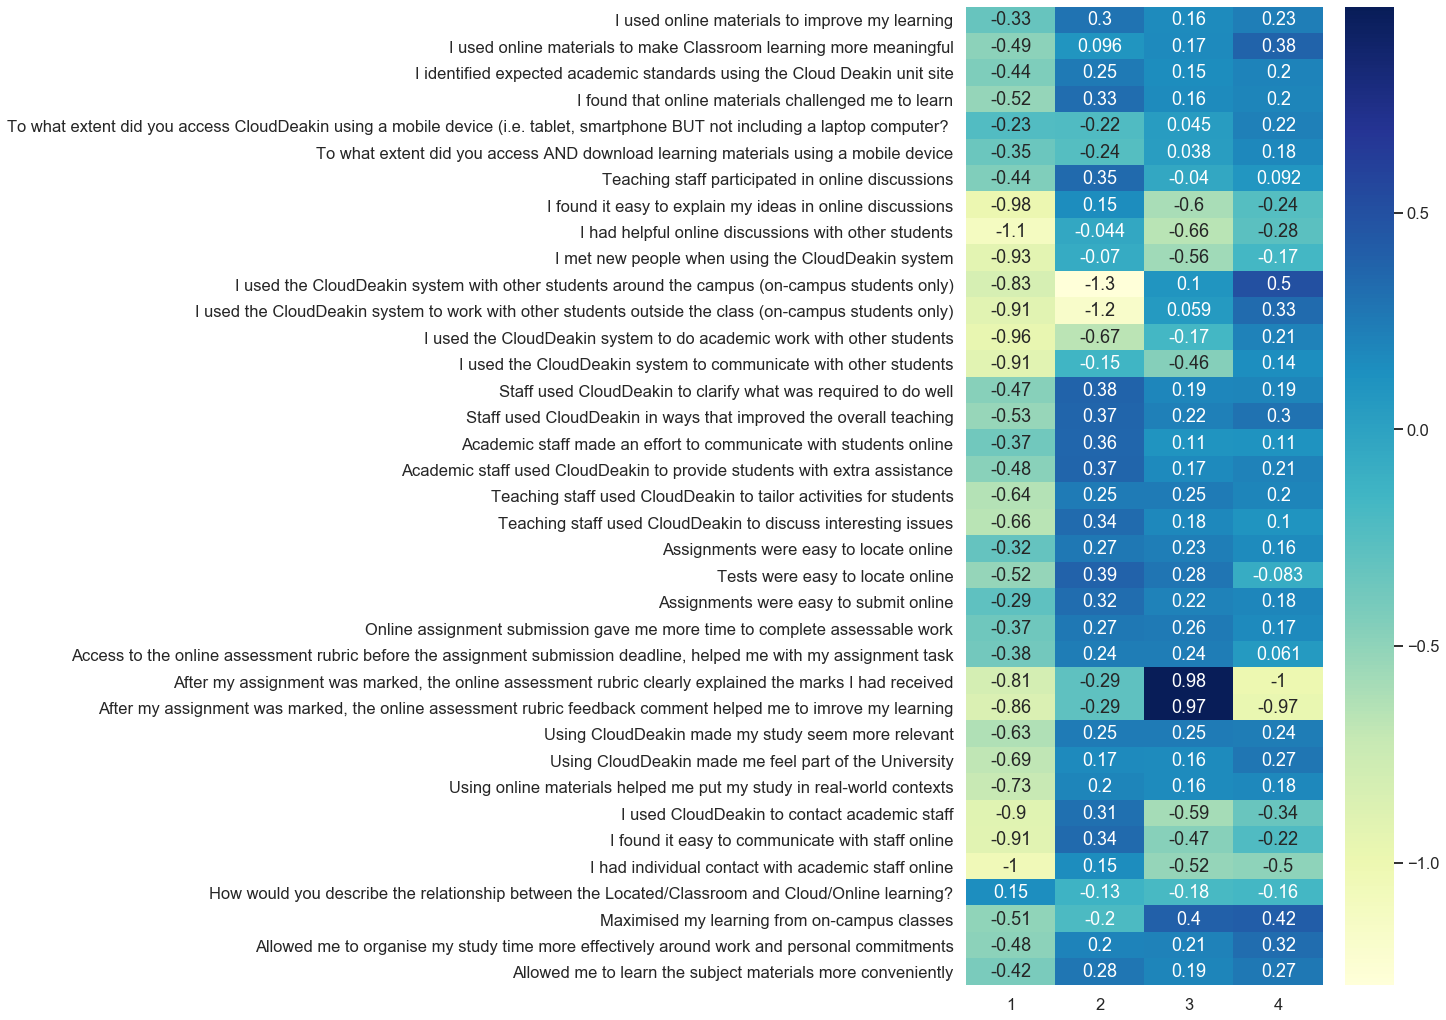

In [68]:
# adjust y-axis size dynamically
size_yaxis = round(x.shape[1] * 0.5)
fig, ax = plt.subplots(figsize=(8,size_yaxis))
# plot the first top_pc components
top_pc = 4
sns.heatmap(loadings.iloc[:,:top_pc], annot=True, cmap="YlGnBu", ax=ax)
plt.show()

In [96]:
#STORING THE DATA SEPERATELY TO COMPUTE OVERALL SUMMARY MEASURES OF THE ORIGNAL DATA

store=z
store.columns=m


In [97]:
store

,I used online materials to improve my learning,I used online materials to make Classroom learning more meaningful,I identified expected academic standards using the Cloud Deakin unit site,I found that online materials challenged me to learn,"To what extent did you access CloudDeakin using a mobile device (i.e. tablet, smartphone BUT not including a laptop computer?",To what extent did you access AND download learning materials using a mobile device,Teaching staff participated in online discussions,I found it easy to explain my ideas in online discussions,I had helpful online discussions with other students,I met new people when using the CloudDeakin system,...,Using CloudDeakin made my study seem more relevant,Using CloudDeakin made me feel part of the University,Using online materials helped me put my study in real-world contexts,I used CloudDeakin to contact academic staff,I found it easy to communicate with staff online,I had individual contact with academic staff online,How would you describe the relationship between the Located/Classroom and Cloud/Online learning?,Maximised my learning from on-campus classes,Allowed me to organise my study time more effectively around work and personal commitments,Allowed me to learn the subject materials more conveniently
0,5.0,1.0,5.0,5.0,1.0,1.0,5.0,4.0,2.0,2.0,...,4.0,2.0,4.0,5.0,5.0,4.0,2.6,1.0,1.0,4.0
1,5.0,1.0,6.0,4.0,4.0,3.0,1.0,4.0,3.0,3.0,...,3.0,3.0,3.0,5.0,5.0,1.0,2.0,1.0,5.0,5.0
2,6.0,1.0,6.0,6.0,1.0,1.0,6.0,6.0,6.0,6.0,...,5.0,6.0,6.0,6.0,5.0,6.0,2.2,1.0,6.0,6.0
3,5.0,1.0,5.0,5.0,1.0,1.0,5.0,5.0,1.0,1.0,...,5.0,4.0,4.0,5.0,5.0,5.0,1.8,1.0,5.0,5.0
4,5.0,1.0,5.0,4.0,3.0,2.0,5.0,6.0,6.0,5.0,...,4.0,4.0,4.0,5.0,5.0,5.0,2.2,1.0,6.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,6.0,6.0,6.0,5.0,2.0,2.0,5.0,1.0,1.0,1.0,...,5.4,5.0,5.0,3.8,3.8,3.0,1.6,5.6,5.6,6.0
620,6.0,6.0,6.0,6.0,4.0,4.0,5.0,6.0,5.0,6.0,...,2.0,2.0,6.0,6.0,6.0,6.0,3.0,2.0,4.0,4.0
621,6.0,6.0,6.0,6.0,4.0,4.0,6.0,6.0,6.0,2.0,...,6.0,6.0,6.0,6.0,6.0,6.0,2.0,5.6,5.8,5.8
622,6.0,6.0,6.0,4.0,4.0,4.0,5.0,5.0,5.0,6.0,...,6.0,6.0,6.0,6.0,6.0,6.0,1.0,6.0,6.0,6.0


In [99]:
summary=store.describe()

In [105]:
summary.to_csv('summary measures.csv')
summary.to_csv('C:/Users/god\'s pride/Desktop/MIS779/summary measures.csv')